In [2]:

import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fredapi import Fred

os.chdir(r'D:\Dropbox\EastBay\misc\oo\learning python\fred inflation')

fred=Fred(api_key='59f9965fe5ba617c83bc86137e478a6a')


# employment by sector (measured in millions)
d=pd.DataFrame()
d['all']=fred.get_series('CPIAUCSL')
d['used_car']=fred.get_series('CUSR0000SETA02')
d['rent']=fred.get_series('CUSR0000SEHA')
d['food']=fred.get_series('CPIFABSL')
d['new_car']=fred.get_series('CUSR0000SETA01')
d['clothes']=fred.get_series('CPIAPPSL')
d['airline']=fred.get_series('CUSR0000SETG01')
d['gas']=fred.get_series('CUSR0000SETB01')



# Normalize price to be 100 for Jan 1, 2020
d2020=d[d.index=='2020-01-01']
dn=d.div(d2020.iloc[0])*100





Text(2020-12-01, 20, 'Pfizer approved')

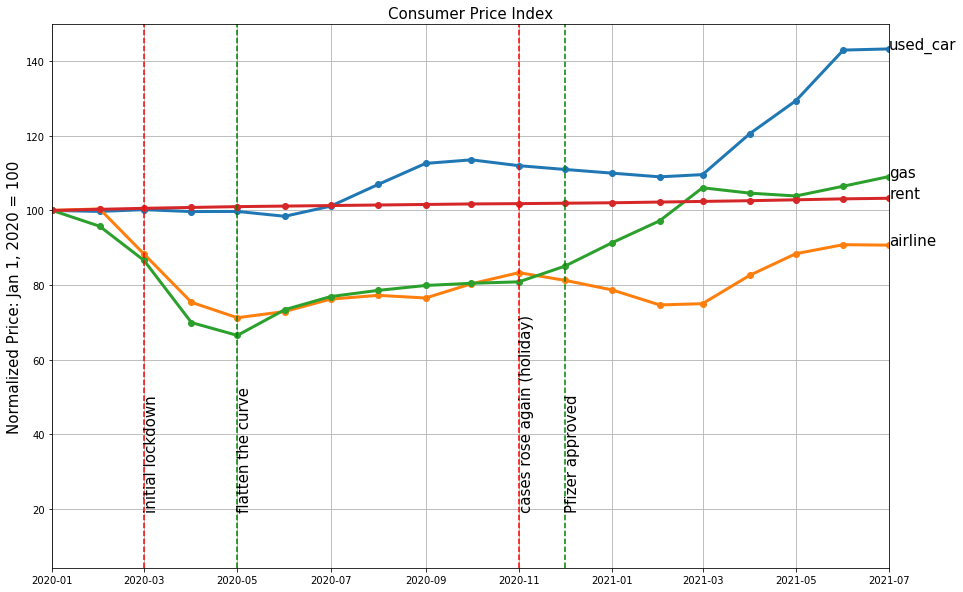

In [5]:
# CPI comparison by category (large change in prices))
cat_names=list(['used_car','airline','gas','rent'])
plt.figure(num=1,figsize=(15,10))
plt.clf()
for i,cat_name in enumerate(cat_names):
    plt.plot(dn.index,dn[cat_name],'o-',linewidth=3,label=cat_name);
    plt.grid('minor')
    plt.xlim(datetime.date(2020,1,1),datetime.date(2021,7,1))
    plt.text(datetime.date(2021,7,1),dn.loc['2021-07-01',cat_name],cat_name,fontsize=15)
plt.title('Consumer Price Index',fontsize=15)
plt.ylabel('Normalized Price: Jan 1, 2020 = 100',fontsize=15)

plt.axvline(datetime.date(2020,3,1),color='r',linestyle='--')
plt.text(datetime.date(2020,3,1),20,'initial lockdown',rotation='vertical',fontsize=15)

plt.axvline(datetime.date(2020,5,1),color='g',linestyle='--')
plt.text(datetime.date(2020,5,1),20,'flatten the curve',rotation='vertical',fontsize=15)

plt.axvline(datetime.date(2020,11,1),color='r',linestyle='--')
plt.text(datetime.date(2020,11,1),20,'cases rose again (holiday)',rotation='vertical',fontsize=15)

plt.axvline(datetime.date(2020,12,1),color='g',linestyle='--')
plt.text(datetime.date(2020,12,1),20,'Pfizer approved',rotation='vertical',fontsize=15)


Observations:
    
    Used car is the main driver of inflation.
    Rent and gas slightly up.
    Airline still yet to recover.